In [1]:
# https://medium.com/analytics-vidhya/using-tensorflow-2-0-to-build-a-cnn-for-image-classification-4e50848ce1c0
# https://www.tensorflow.org/tutorials/images/cnn
# https://www.tensorflow.org/api_docs/python/tf/keras/Model
# https://keras.io/api/models/model/#summary-method
# https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset
# https://enmilocalfunciona.io/tratamiento-de-imagenes-usando-imagedatagenerator-en-keras/

# Load pickled data
import pickle
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

assert(len(x_train) == len(y_train))
assert(len(x_valid) == len(y_valid))
assert(len(x_test) == len(y_test))

x_train, x_test, x_valid = np.array(x_train, np.float32), np.array(x_test, np.float32), np.array(x_valid, np.float32)

# Number of training examples
n_train = len(x_train)

# Number of validation examples
n_validation = len(x_valid)

# Number of testing examples.
n_test = len(x_test)

# Shape of image
image_shape = x_train[0].shape

# Unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

signals = pd.read_csv('signnames.csv')


In [3]:
### Preprocess the data.

def normalize(data):
    """
    Normalize the dataset (data) using the mean and the standard deviation
    
    Parameters:
        data: dataset
        
    Returns:
        
    """
    mean = np.mean(data)
    std = np.std(data)
    
    return (data - mean) / std

# Converting to grayscale
x_train = np.sum(x_train / 3, axis = 3, keepdims = True)
x_test = np.sum(x_test / 3, axis = 3, keepdims = True)
x_valid = np.sum(x_valid / 3, axis = 3, keepdims = True)

# Applying basic normalization (zero mean, standard deviation)
x_train = normalize(x_train)
x_test = normalize(x_test)
x_valid = normalize(x_valid)

In [4]:
# Training parameters.

learning_rate = 0.001
training_steps = 200
batch_size = 128
display_step = 10
num_classes = n_classes

# Network parameters.
conv1_filters = 6 # number of filters for 1st conv layer.
conv2_filters = 16 # number of filters for 2nd conv layer.
fc1_units = 120 # number of neurons for 1st fully-connected layer.
fc2_units = 84 # number of neurons for 1st fully-connected layer.


In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(len(x_train)).batch(batch_size).prefetch(1)

In [5]:

model = models.Sequential()
model.add(layers.Conv2D(conv1_filters, (5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(conv2_filters, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(fc1_units, activation='relu'))
model.add(layers.Dense(fc2_units, activation='relu'))
model.add(layers.Dense(num_classes))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 10, batch_size = 200, 
                    validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

395/395 - 2s - loss: 0.7784 - accuracy: 0.9039


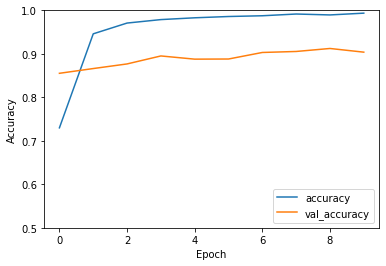

In [9]:
%matplotlib inline

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [10]:
print(test_acc)

0.9038796424865723
